# **ÖDEV-3**

1- Persona.csv verisini kullanarak EDA (Exploratory data analysis) yapın.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 170)

In [3]:
df = pd.read_csv("persona.csv")

In [4]:
df.head()

,PRICE,SOURCE,SEX,COUNTRY,AGE
0,39,android,male,bra,17
1,39,android,male,bra,17
2,49,android,male,bra,17
3,29,android,male,tur,17
4,49,android,male,tur,17


In [5]:
df.tail()

,PRICE,SOURCE,SEX,COUNTRY,AGE
4995,29,android,female,bra,31
4996,29,android,female,bra,31
4997,29,android,female,bra,31
4998,39,android,female,bra,31
4999,29,android,female,bra,31


In [6]:
df.shape

(5000, 5)

In [7]:
df.isnull().sum()

PRICE      0
SOURCE     0
SEX        0
COUNTRY    0
AGE        0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   PRICE    5000 non-null   int64 
 1   SOURCE   5000 non-null   object
 2   SEX      5000 non-null   object
 3   COUNTRY  5000 non-null   object
 4   AGE      5000 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 234.4+ KB


2-Persona.csv verisini kullanarak Kategorik ve Numerik Değişkenleri belirleyin.

In [9]:
for col in df.columns:
    print("type", col, "is", df[col].dtype)

type PRICE is int64
type SOURCE is object
type SEX is object
type COUNTRY is object
type AGE is int64


In [10]:
print(df["SOURCE"].nunique())
print(df["SOURCE"].unique())
print(df["SOURCE"].value_counts())

2
['android' 'ios']
android    2974
ios        2026
Name: SOURCE, dtype: int64


In [11]:
print(df["SEX"].nunique())
print(df["SEX"].unique())
print(df["SEX"].value_counts())

2
['male' 'female']
female    2621
male      2379
Name: SEX, dtype: int64


In [12]:
print(df["COUNTRY"].nunique())
print(df["COUNTRY"].unique())
print(df["COUNTRY"].value_counts())

6
['bra' 'tur' 'usa' 'can' 'deu' 'fra']
usa    2065
bra    1496
deu     455
tur     451
fra     303
can     230
Name: COUNTRY, dtype: int64


In [13]:
df[["PRICE", "AGE"]].describe([0.05, 0.10, 0.25, 0.50, 0.75, 0.80, 0.90, 0.95, 0.99]).T

,count,mean,std,min,5%,10%,25%,50%,75%,80%,90%,95%,99%,max
PRICE,5000.0,34.1320,12.464897,9.0,19.0,19.0,29.0,39.0,39.0,49.0,49.0,49.0,59.0,59.0
AGE,5000.0,23.5814,8.995908,15.0,15.0,15.0,17.0,21.0,27.0,30.0,36.0,43.0,53.0,66.0


3-Persona.csv verisini kullanarak Kategorik ve Numerik Değişkenleri analiz edin. Yorumda bulunun.

Çoğunluk android kullanıyor


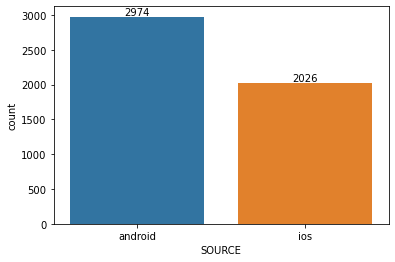

Cinsiyette dengeli bir dağılım görüyoruz


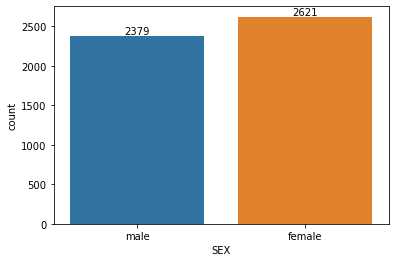

Kullanıcıların yüzde 41'i USA tarafında
USA yüzdesi: %41.3


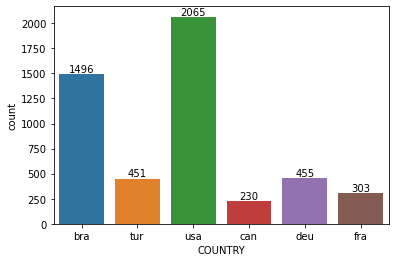

In [14]:
print("Çoğunluk android kullanıyor")
ax = sns.countplot(x=df["SOURCE"], data=df)
ax.bar_label(ax.containers[0])
plt.show(ax)

print("Cinsiyette dengeli bir dağılım görüyoruz")
ax = sns.countplot(x=df["SEX"], data=df)
ax.bar_label(ax.containers[0])
plt.show(ax)

print("Kullanıcıların yüzde 41'i USA tarafında")
print("USA yüzdesi: %" + str((100*df["COUNTRY"].value_counts()["usa"])/len(df)))
ax = sns.countplot(x=df["COUNTRY"], data=df)
ax.bar_label(ax.containers[0])
plt.show(ax)

PRICE'ın histogram grafiğinde normal dağılıma yakın güzel bir grafik elde edinilmiş ama PRICE değişkeninde 
belli sayılarda değer almış bu da grafiği aşağıdaki gibi aralıklı kılmış yani bu değişken sürekli değil. 
Doğal olarak da yoğunluklar PRICE'ın alabildiği belli değerlerin olduğu yerde toplanmış durumda.


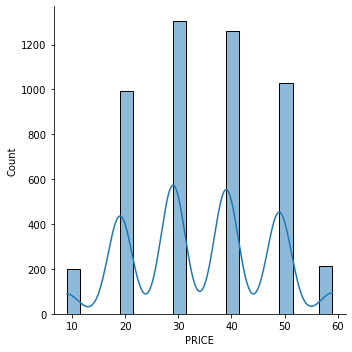

AGE'in histogramına baktığımız zaman sol tarafında bir yığılım görüyoruz bu yığılımda değişkenin 
medyanının ve ortalamasının sol tarafa yakın olduğunu anlayabiliriz, en sağ uçtaki değerler de 
aykırı değerler olabilir


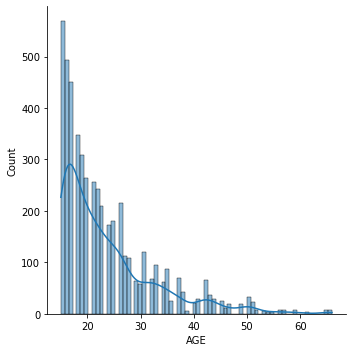

PRICE'ın boxplotunda verilerin cogunluk kısmı 20 ile 50 arasında bulunuyor ama değişkende PRICE'ların 
belli sayılarda değer almış olması boxplotun dışında kalan verilerin sadece sağda ve solda birer nokta 
olarak kalmasına sebebiyet veriyor. 10 ve 60 civarında PRICE değerleri aykırı diyebiliriz.


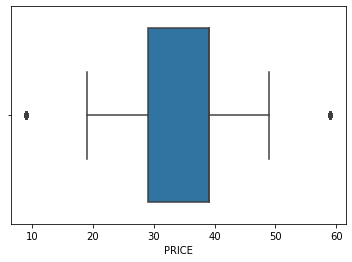

AGE'in histogramına bakarken dediğimiz gibi yaklaşık 45'ten büyük değerlerin aykırı olduğunu görüyoruz 
Ayrıca histogramda da anladığımız gibi yoğunluk ve değerlerin büyük çoğunluğu sol tarafta bulunuyor


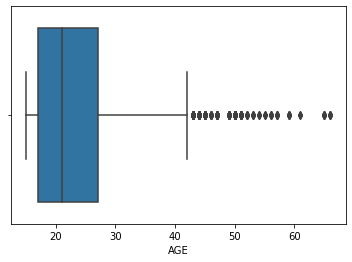

In [15]:
print("PRICE'ın histogram grafiğinde normal dağılıma yakın güzel bir grafik elde edinilmiş ama PRICE değişkeninde \n"
       "belli sayılarda değer almış bu da grafiği aşağıdaki gibi aralıklı kılmış yani bu değişken sürekli değil. \n"
       "Doğal olarak da yoğunluklar PRICE'ın alabildiği belli değerlerin olduğu yerde toplanmış durumda.")
sns.displot(df["PRICE"], bins=20, kde=True)
plt.show()

print("AGE'in histogramına baktığımız zaman sol tarafında bir yığılım görüyoruz bu yığılımda değişkenin \n"
       "medyanının ve ortalamasının sol tarafa yakın olduğunu anlayabiliriz, en sağ uçtaki değerler de \n"
       "aykırı değerler olabilir")
sns.displot(df["AGE"], bins=70, kde=True)
plt.show()

print("PRICE'ın boxplotunda verilerin cogunluk kısmı 20 ile 50 arasında bulunuyor ama değişkende PRICE'ların \n"
       "belli sayılarda değer almış olması boxplotun dışında kalan verilerin sadece sağda ve solda birer nokta \n"
       "olarak kalmasına sebebiyet veriyor. 10 ve 60 civarında PRICE değerleri aykırı diyebiliriz.")
sns.boxplot(x=df["PRICE"])
plt.show()

print("AGE'in histogramına bakarken dediğimiz gibi yaklaşık 45'ten büyük değerlerin aykırı olduğunu görüyoruz \n"
       "Ayrıca histogramda da anladığımız gibi yoğunluk ve değerlerin büyük çoğunluğu sol tarafta bulunuyor")
sns.boxplot(x=df["AGE"])
plt.show()